In [6]:
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime, timedelta
from scipy import signal
import librosa
import librosa.display

In [7]:
sample_rate         = 32000     #Hz

M1_amplifier_dB     = 26.       #dB
M3_amplifier_dB     = 32.       #dB
M1_sensitivity_dB   = -165.     #dB re 1V/µPa
M3_sensitivity_dB   = -170.     #dB re 1V/µPa

station             = 'M1'
                            # ( year, month, day, hour, min, sec, microsecond)
start_time          = datetime( 2014,     6,  24,    5,   0,   0 )
end_time            = datetime( 2014,     6,  24,    5,  10,   0 )

freq_band           = [2000, 10000] #Hz

In [8]:
duration = end_time - start_time
files_num = int(np.ceil(duration.seconds / 600))

def file_name(station, start, end):
    return f'{station}_{start.day:02d}{start.month:02d}{start.hour:02d}{start.minute:02d}-{end.day:02d}{end.month:02d}{end.hour:02d}{end.minute:02d}.dat'

current_time = start_time
samples = np.zeros(600 * sample_rate)
data_arrays = []

for i in range(files_num):
    next_time = start_time + timedelta(minutes = 10)
    with open(file_name(station, current_time, next_time), 'r') as fID:
        samples = np.fromfile(fID, np.int16).astype(np.float32)
        data_arrays.append(samples)
    continue_time = next_time

data_array_V = np.concatenate(data_arrays)

constant = (M1_sensitivity_dB + M1_amplifier_dB) * (station == 'M1') + (M3_sensitivity_dB + M3_amplifier_dB) * (station == 'M3')

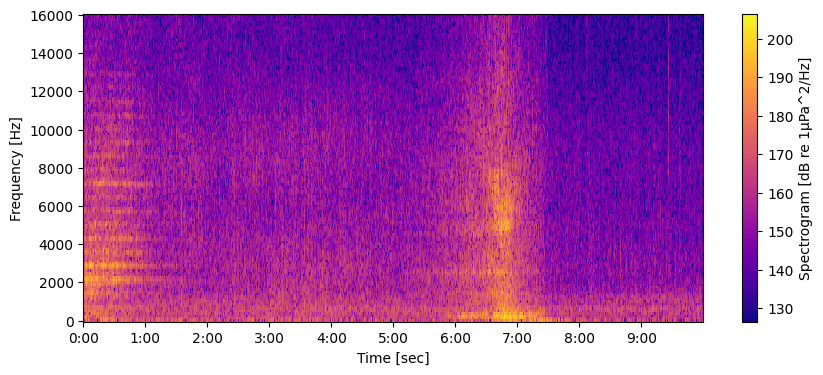

In [20]:
stft = librosa.stft(data_array_V, n_fft=256, hop_length=256, win_length=256, window='hann', center=False)
# hop_length = overlaping length
spectrogram = np.abs(stft)
spectrogram_dB = librosa.amplitude_to_db(spectrogram/256) - constant


plt.figure(figsize=(10,4))
img = librosa.display.specshow(spectrogram_dB, x_axis='time', y_axis='hz', sr=sample_rate, cmap='plasma', n_fft=256, hop_length=256)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(img, label='Spectrogram [dB re 1μPa^2/Hz]')
plt.show()